In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))


# Any results you write to the current directory are saved as output.

Readme.md
__pycache__
augmentation_transforms.py
cifar10_policies.py
data_readme.txt
final_ensemble.csv
get_augment_image_examples.ipynb
iceberg.tar.gz
keras-model-for-beginners-0-210-on-lb-eda-r-d.ipynb
my-best-single-model-simple-cnn-lb-0-1541.py
sample_submission.csv
shvn_policies.py
svhn_select_policies.py
test.json
train.json



This kernel is specifically is for Beginners who want's to experiment building CNN using Keras. By using this kernel, you can expect to get good score and also learn keras. 
Keras is simple frameworks where we can initialize the model and keep stacking the layers we want. It makes building deep neural networks very easy.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [3]:
#Load the data.
train = pd.read_json("train.json")

In [4]:
test = pd.read_json("test.json")

In [5]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [17]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
    
record = 12


band_1 = np.array(X_band_1[record,:,:]).reshape(75, 75)
band_2 = np.array(X_band_1[record,:,:]).reshape(75, 75)
band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)

# Rescale
a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())

img = np.dstack((a, b, c))     
plotmy3d((X_band_1[record,:,:] + X_band_2[record,:,:])/2, 'Iceberg')



That's a cool looking iceberg we have. Remember, in radar data, the shape of the iceberg is going to be like a mountain as shown in here. Since this is not a actual image but scatter from radar, the shape is going to have peaks and distortions like these. The shape of the ship is going to be like a point, may be like a elongated point. From here the structural differences arise and we can exploit those differences using a CNN. It would be helpful if we can create composite images using the backscatter from radar.

In [7]:
plotmy3d(X_band_1[14,:,:], 'Ship')

That's a ship, looks like a elongated point. We don't have much resolution in images to visualize the shape of the ship. However CNN is here to help. There are few papers on ship iceberg classification like this:
http://elib.dlr.de/99079/2/2016_BENTES_Frost_Velotto_Tings_EUSAR_FP.pdf
However their data have much better resolution so I don't  feel that the CNN they used would be suitable here.

In [8]:
#%pylab inline

In [9]:
from shvn_policies import good_policies
from augmentation_transforms import *

my_policies = good_policies()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('ShearX', 0.7, 2), ('Invert', 0.1, 5)]


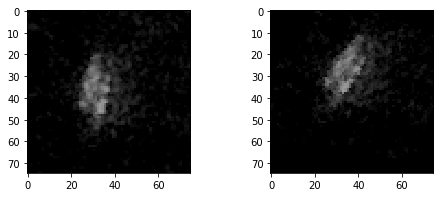

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)


epoch_policy = my_policies[np.random.choice(len(my_policies))]

print(epoch_policy)

final_img = apply_policy([('ShearY', 1, 8), ('Rotate', 1, 7)], img)

pos = ax1.imshow(img)
ax2.imshow(final_img)

In [42]:
np.min(img)

-0.38044906

In [37]:
trans = final_img[:,:,0]*(band_1.max()-band_1.min()) + band_1.mean()

In [38]:
plotmy3d(trans, 'iceberg')

In [ ]:
X_band_1[record,:,:].shape

In [ ]:
type(X_band_1[record,:,:])

In [ ]:
type(trans)